In [1]:
from transformers import pipeline
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
device = "cuda"
checkpoint = "depth-anything/Depth-Anything-V2-base-hf"
pipe = pipeline("depth-estimation", model=checkpoint, device=device)

In [2]:
%timeit
image_left = Image.open("../data/Материалы/Фотографии для калибровки и тестирования/leftcamera/Cam2_7.jpg").convert('RGB')
image_right = Image.open("../data/Материалы/Фотографии для калибровки и тестирования/rightcamera/Cam1_7.jpg").convert('RGB')

predictions_right = pipe(image_right)
predictions_left = pipe(image_left)
left_image = np.array(predictions_left["depth"])
right_image = np.array(predictions_right["depth"])

In [3]:
B = 412
D1 = 660
D2 = 641
f = 80
optical_distortion = 0.004
Do = 639
disparity = abs(D1 - D2)
Z = (B * f) / disparity
Z

1734.7368421052631

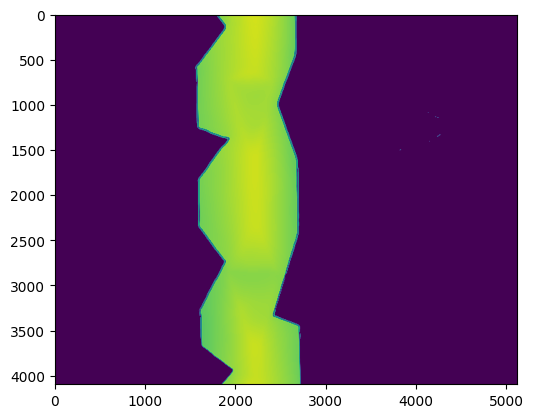

In [4]:
import matplotlib.pyplot as plt
for_test = left_image.copy()
for_test[for_test<100] = 0
plt.imshow(for_test)

In [5]:
open_cv_image = np.array(image_left)
open_cv_image = open_cv_image[:, :, ::-1].copy()

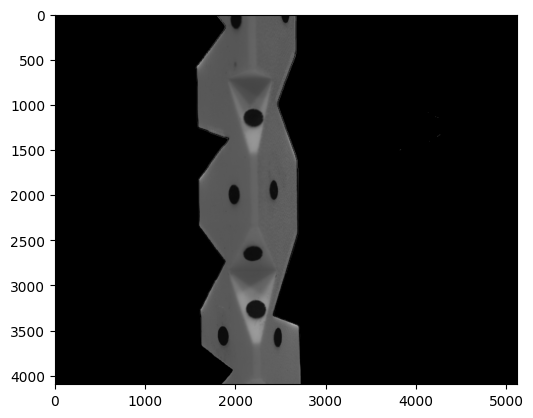

In [6]:


mask = for_test
rgb = open_cv_image


rgb[mask == 0] = 0


plt.imshow(rgb)
plt.show()

In [7]:
import cv2
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# blobDetectorParameters  = cv2.SimpleBlobDetector_Params()
# blobDetectorParameters.filterByArea = True
# blobDetectorParameters.minArea = 20
# blobDetectorParameters.maxArea = 1000
# blobDetectorParameters.minDistBetweenBlobs = 1
# blobDetectorParameters.minCircularity = 0.5
# blobDetectorParameters.filterByCircularity = True
# blobDetectorParameters.filterByColor = True
# blobDetectorParameters.blobColor = 0
# blobDetectorParameters.filterByConvexity = True
# blobDetectorParameters.minConvexity = 0.5 
# blobDetectorParameters.filterByInertia = False

# detector = cv2.SimpleBlobDetector_create(blobDetectorParameters)

 
# # Detect dots.
# keypoints = detector.detect(gray)

# print("Black Dots Count is:",len(keypoints))
# print(keypoints)
# im_with_keypoints = cv2.drawKeypoints(rgb, keypoints, np.array([]), (0,250,250), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# im_with_keypoints = cv2.resize(im_with_keypoints,(1080,720))
# cv2.imshow("Output image:", im_with_keypoints)
# cv2.waitKey(0)

In [11]:
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Поиск контуров
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Параметры для фильтрации по радиусу
min_radius = 20
max_radius = 1000

# Проход по контурам
for contour in contours:
    # Минимальный ограничивающий круг для контура
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Фильтрация по радиусу
    if min_radius <= radius <= max_radius:
        # Нарисовать окружность, если радиус удовлетворяет условиям
        cv2.circle(rgb, (int(x), int(y)), int(radius), (255, 0, 0), 2)

# Сохранение результата
cv2.imwrite('binary.png', binary)
cv2.imwrite('result.png', rgb)

True